In [8]:
zip_path = '/content/drive/My\ Drive/Colab_Test/Dataset/6.\ Deep\ Learning/cats-dogs.zip'
!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

replace /content/test/cat/14392.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


#Function

In [17]:
def evaluate_accuracy(history):
  history_dataframe = pd.DataFrame(history.history)

  max_acc_index = history_dataframe[history_dataframe['accuracy']==max(history_dataframe['accuracy'])].index.values
  max_acc = history_dataframe.loc[max_acc_index]['accuracy']
  max_val_acc_index = history_dataframe[history_dataframe['val_accuracy']==max(history_dataframe['val_accuracy'])].index.values
  max_val_acc = history_dataframe.loc[max_val_acc_index]['val_accuracy']

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(max_acc_index, max_acc, 'o', c='k', ms=4, label='max accuracy')
  plt.plot(max_val_acc_index, max_val_acc, 'o', c='k', ms=4, label='max val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Maximum accuracy :", max_acc)
  print("---------------------------------------")
  print("Minimun validation accuracy :", max_val_acc)

#OOP Import

In [15]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

#Deeper Model

In [11]:
model_deeper = Sequential()

model_deeper.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model_deeper.add(MaxPooling2D((2, 2)))
model_deeper.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(MaxPooling2D((2, 2)))
model_deeper.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(MaxPooling2D((2, 2)))

model_deeper.add(Flatten())

model_deeper.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_deeper.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.001, momentum=0.9)

model_deeper.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model_deeper.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)            

In [12]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [13]:
history_base_model = model_deeper.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 49s 494ms/step - loss: 0.6997 - accuracy: 0.5510 - val_loss: 0.6612 - val_accuracy: 0.6070
Epoch 2/75
100/100 [==============================] - 49s 486ms/step - loss: 0.6555 - accuracy: 0.6055 - val_loss: 0.6358 - val_accuracy: 0.6345
Epoch 3/75
100/100 [==============================] - 48s 482ms/step - loss: 0.6438 - accuracy: 0.6202 - val_loss: 0.6334 - val_accuracy: 0.6310
Epoch 4/75
100/100 [==============================] - 48s 481ms/step - loss: 0.6222 - accuracy: 0.6451 - val_loss: 0.6330 - val_accuracy: 0.6270
Epoch 5/75
100/100 [==============================] - 48s 478ms/step - loss: 0.6067 - accuracy: 0.6659 - val_loss: 0.6635 - val_accuracy: 0.5893
Epoch 6/75
100/100 [==============================] - 48s 483ms/step - loss: 0.5920 - accuracy: 0.6808 - val_loss: 0.5751 - val_accuracy: 0.7043
Epoch 7/75
100/100 [==============================] - 49s 486ms/step - loss: 0.5705 - accuracy: 0.7023 - val_loss: 0.5575 - val_ac

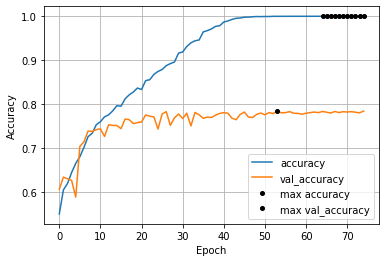

Maximum accuracy : 64    1.0
65    1.0
66    1.0
67    1.0
68    1.0
69    1.0
70    1.0
71    1.0
72    1.0
73    1.0
74    1.0
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 53    0.78508
Name: val_accuracy, dtype: float64


In [16]:
evaluate_accuracy(history_base_model)

#Kesimpulan :

**Dari dataset Cats-Dogs dengan menggunakan Deeper Model didapatkan akurasi terbaik dengan Validation Accuracynya adalah 0.7815 dan Validation Lossnya adalah 0.5337 pada epoch 34.**

Namun akurasi tertinggi pada dataset diatas berada di epoch 53 dengan Validation Accuracy 0.78508 dan Validation Loss 0.8490.**

#Augmented

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset = '/content/'

In [25]:

aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [28]:
history_model_augmented = model_deeper.fit_generator(train_iterator_aug, steps_per_epoch=len(train_iterator_aug), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 144s 1s/step - loss: 0.8129 - accuracy: 0.6465 - val_loss: 0.5475 - val_accuracy: 0.7131
Epoch 2/75
100/100 [==============================] - 144s 1s/step - loss: 0.5526 - accuracy: 0.7150 - val_loss: 0.5049 - val_accuracy: 0.7433
Epoch 3/75
100/100 [==============================] - 144s 1s/step - loss: 0.5178 - accuracy: 0.7434 - val_loss: 0.4857 - val_accuracy: 0.7558
Epoch 4/75
100/100 [==============================] - 145s 1s/step - loss: 0.4944 - accuracy: 0.7602 - val_loss: 0.4604 - val_accuracy: 0.7762
Epoch 5/75
100/100 [==============================] - 143s 1s/step - loss: 0.4794 - accuracy: 0.7678 - val_loss: 0.4488 - val_accuracy: 0.7820
Epoch 6/75
100/100 [==============================] - 143s 1s/step - loss: 0.4633 - accuracy: 0.7785 - val_loss: 0.4652 - val_accuracy: 0.7735
Epoch 7/75
100/100 [==============================] - 144s 1s/step - loss: 0.4559 - accuracy: 0.7842 - val_loss: 0.4345 - val_accuracy: 0.7917

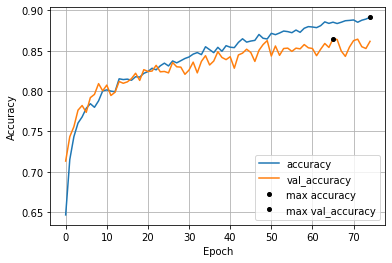

Maximum accuracy : 74    0.891286
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 65    0.864565
Name: val_accuracy, dtype: float64


In [29]:
evaluate_accuracy(history_model_augmented)

#Kesimpulan :

**Dari dataset Cats-Dogs dengan menggunakan Deeper Model setelah di augmentasi dengan width_shift_range, height_shift_range dan horizontal_flip didapatkan akurasi terbaik dengan Validation Accuracynya adalah 0.8539 dan Validation Lossnya adalah 0.3252 pada epoch 65.**